- age = age in years
- sex = (1 = male; 0 = female)
- cp = chest pain type (4 values)
- trestbps = resting blood pressure
- chol = serum cholestoral in mg/dl
- fbs = (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- restecg = resting electrocardiographic results (values 0,1,2)
- thalach = maximum heart rate achieved
- exang = exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope = the slope of the peak exercise ST segment
- ca = number of major vessels (0-3) colored by flourosopy
- thal = thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target = 1 or 0

Data source (Kaggle): https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploratory Data Analysis (EDA)

In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## Visualization

In [7]:
crosstab_sex = pd.crosstab(data['sex'], data['target'])
crosstab_sex

target,0,1
sex,,
0,86,226
1,413,300


On the above data, sex value of 0 = Female; 1 = Male

In [8]:
crosstab_cp = pd.crosstab(data['cp'], data['target'])
crosstab_cp

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


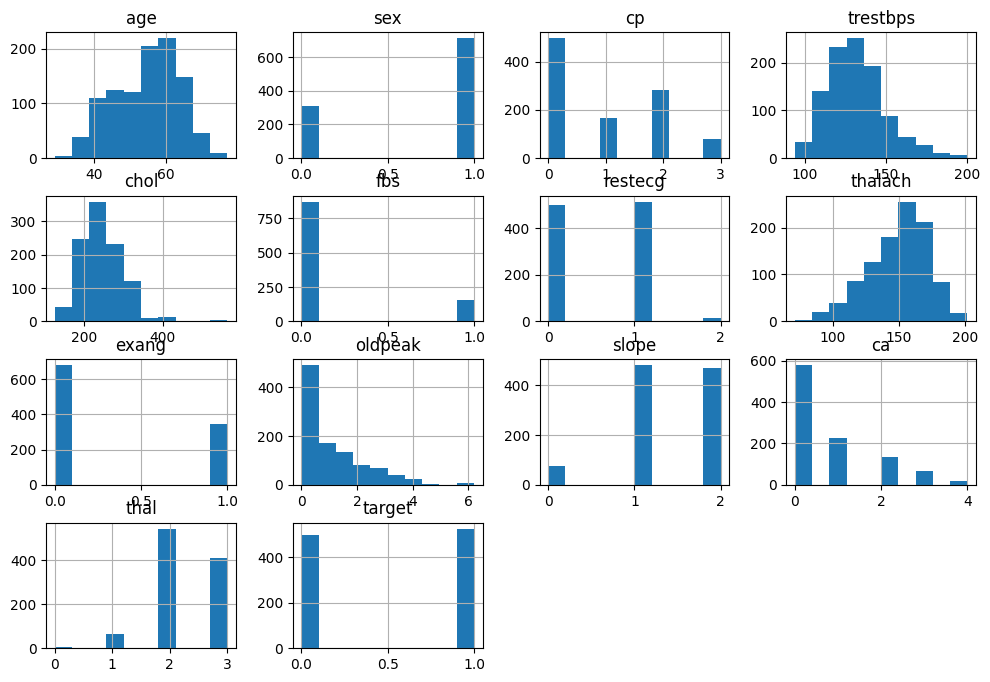

In [11]:
data.hist(figsize=(12,8))
plt.show()

In [19]:
# Get the correlation matrix
corr = data.corr()
corr 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


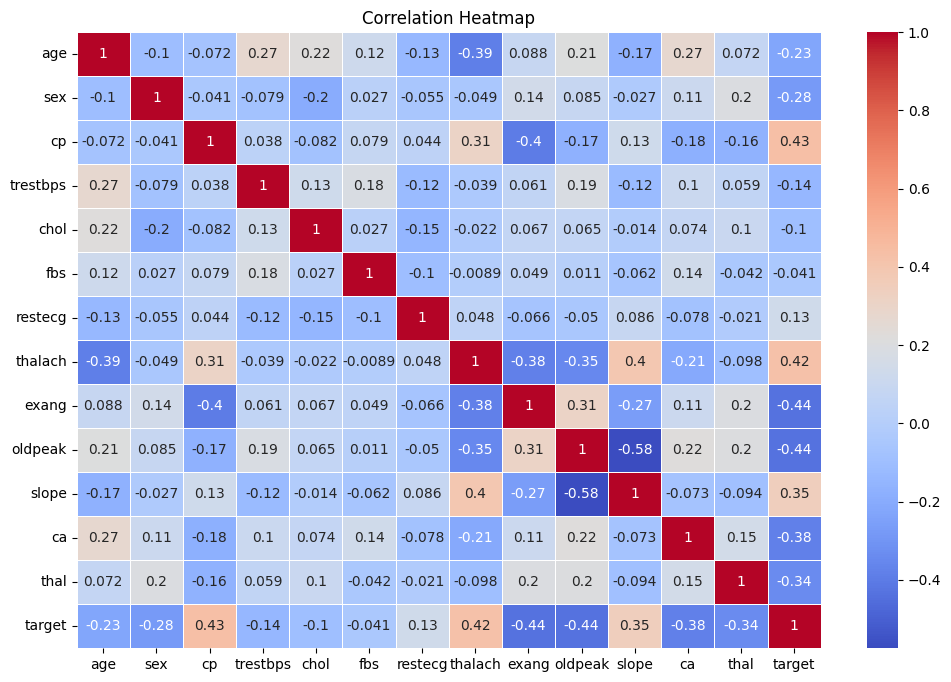

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

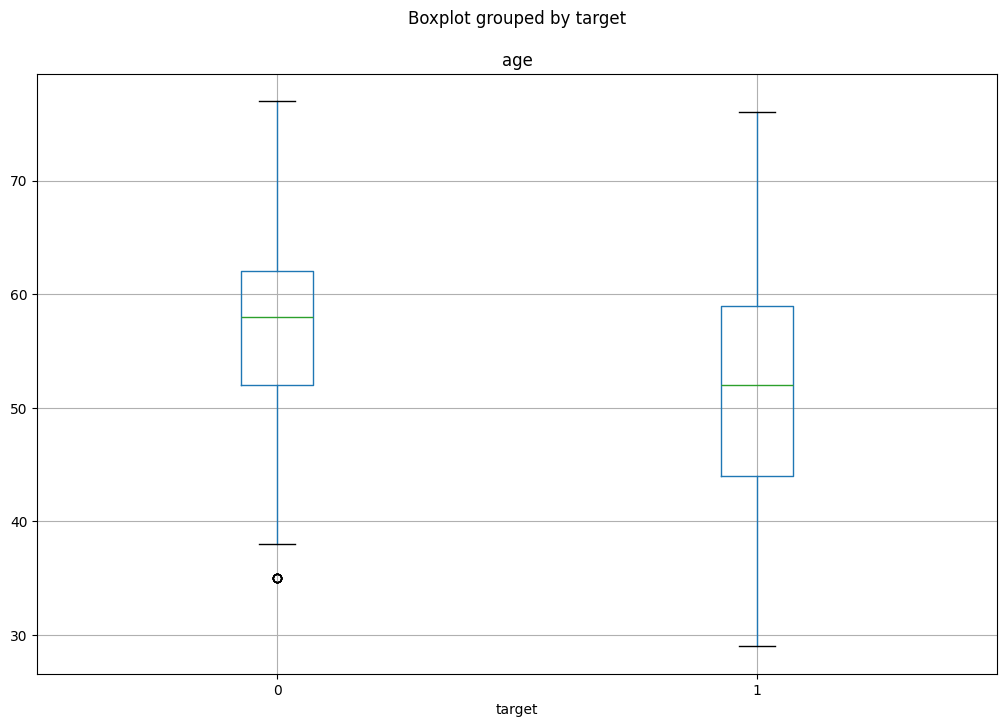

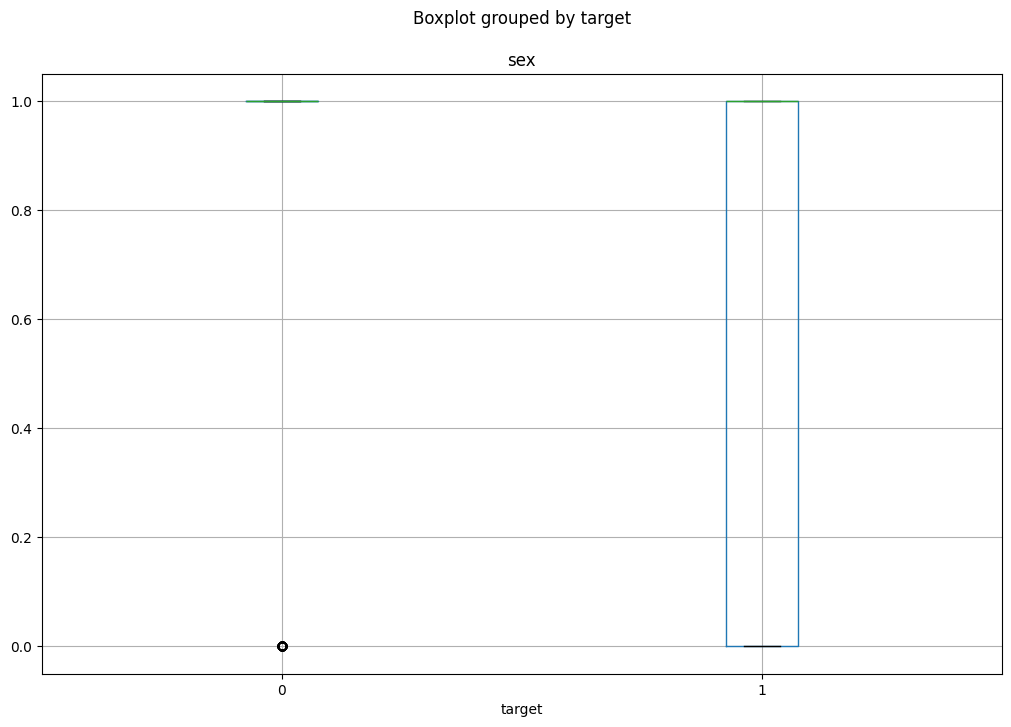

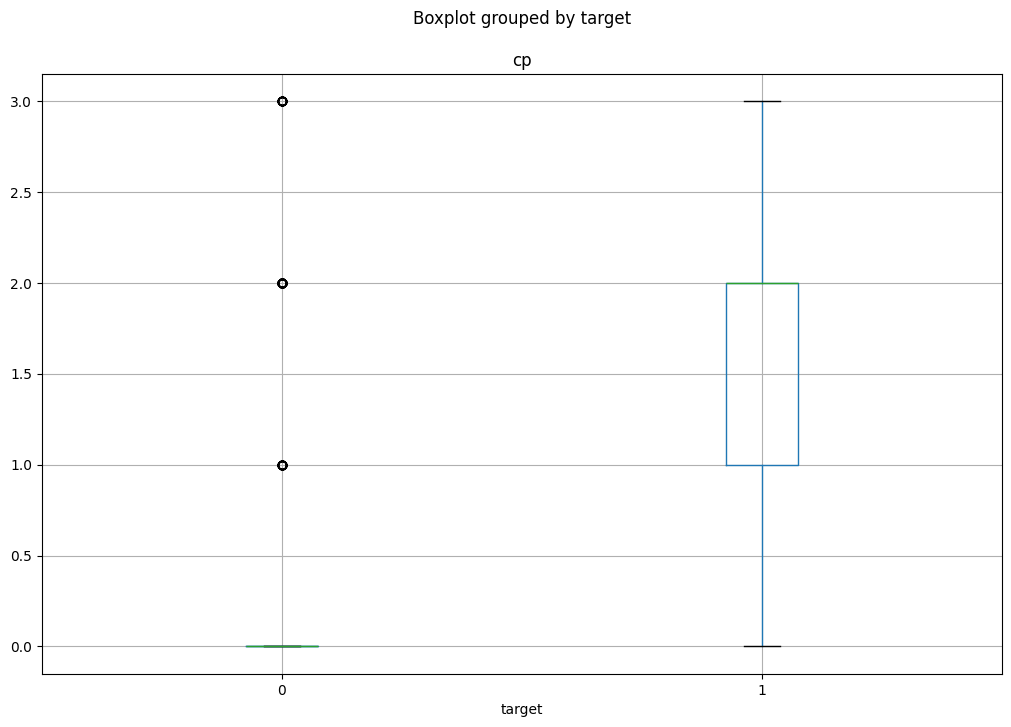

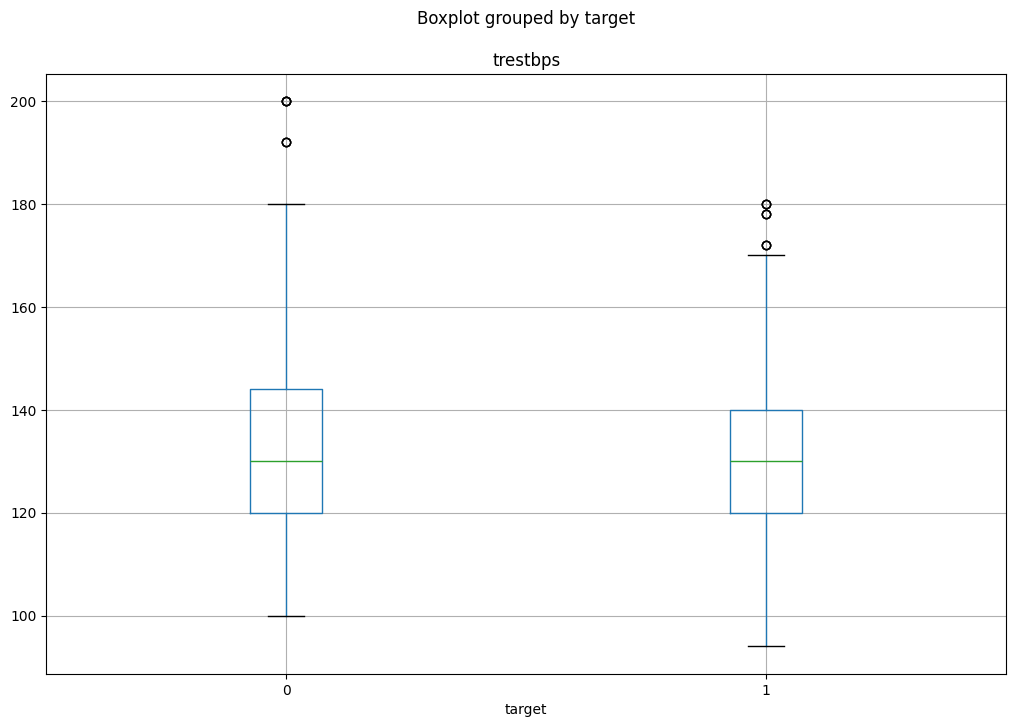

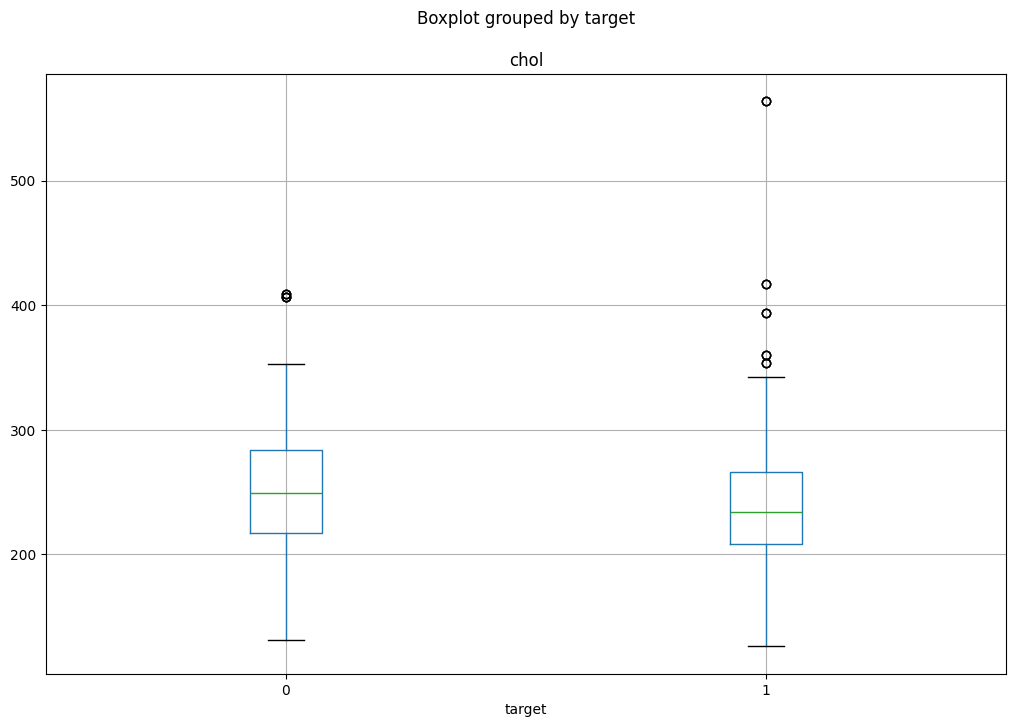

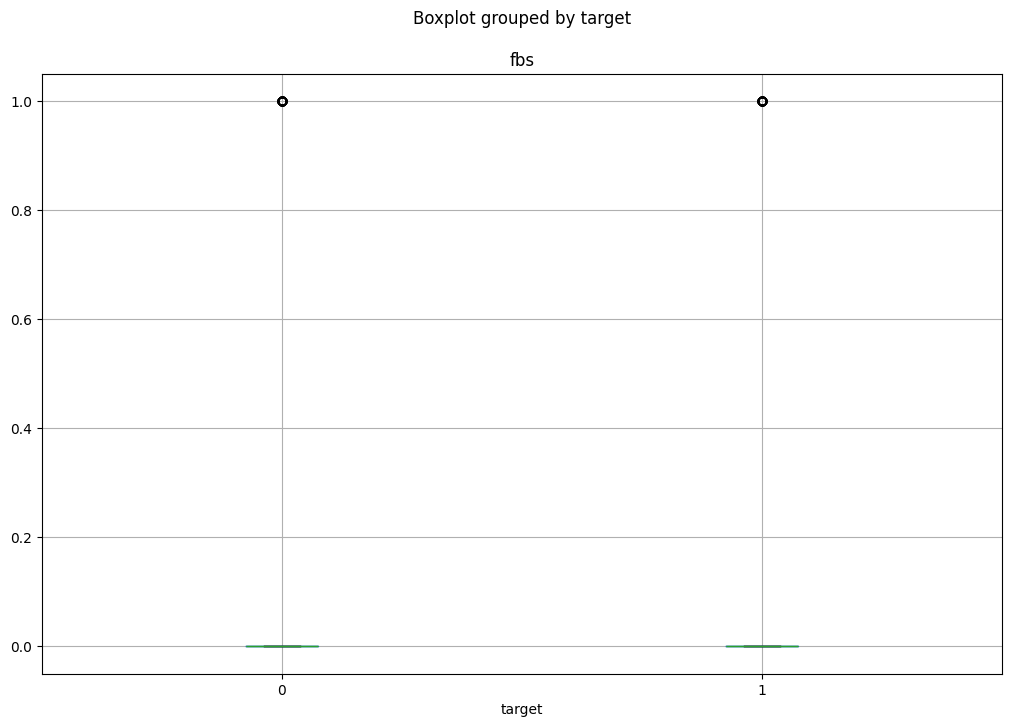

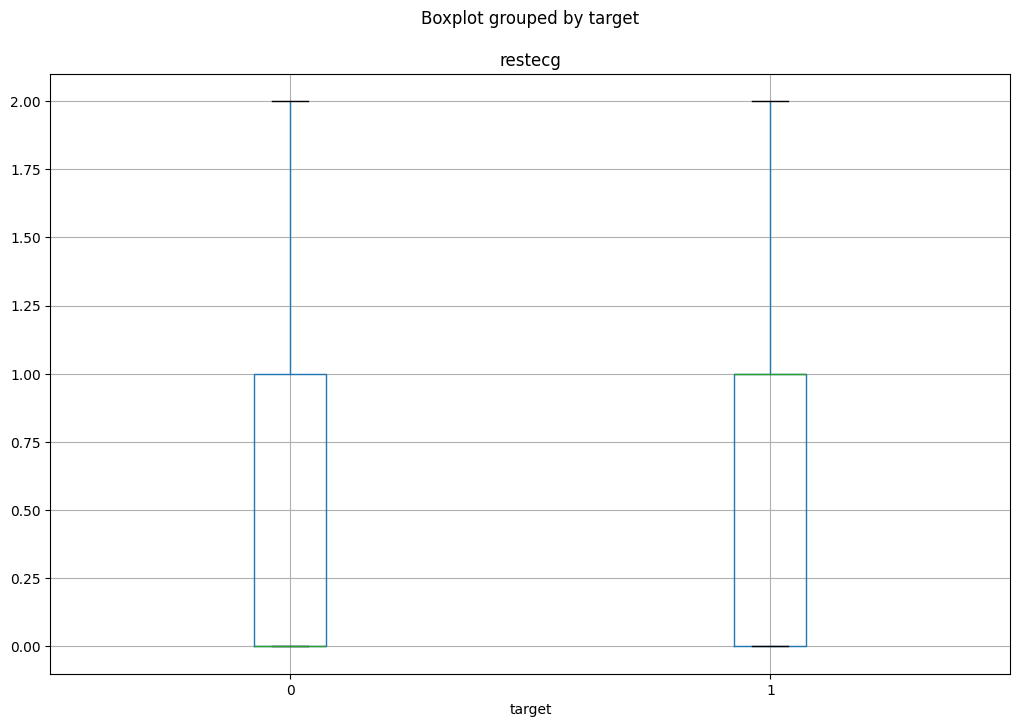

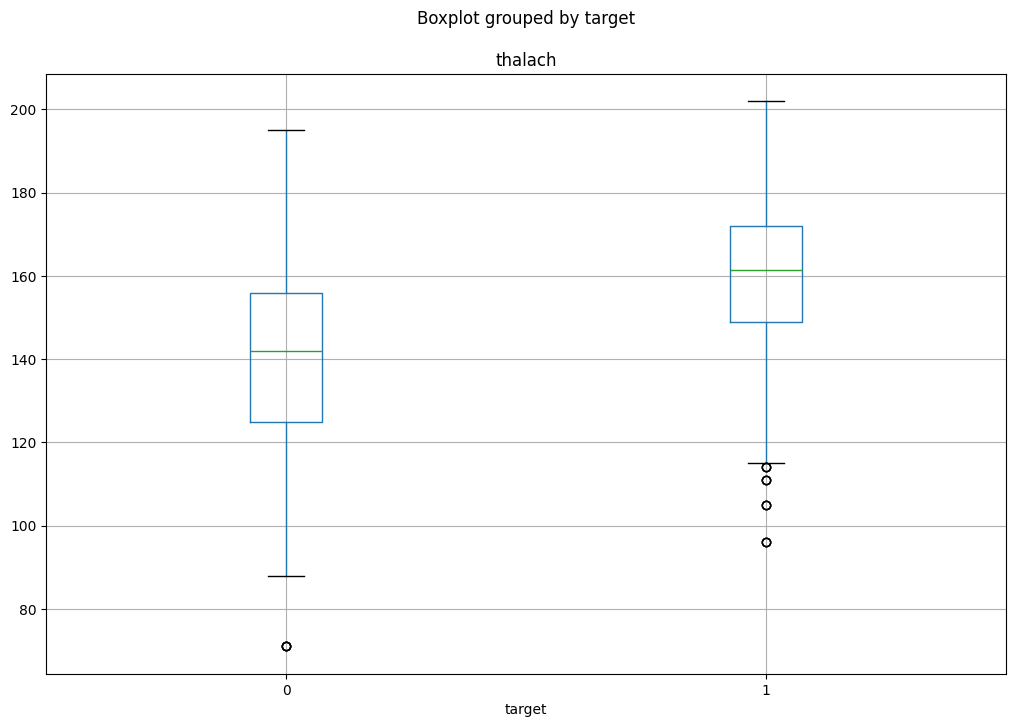

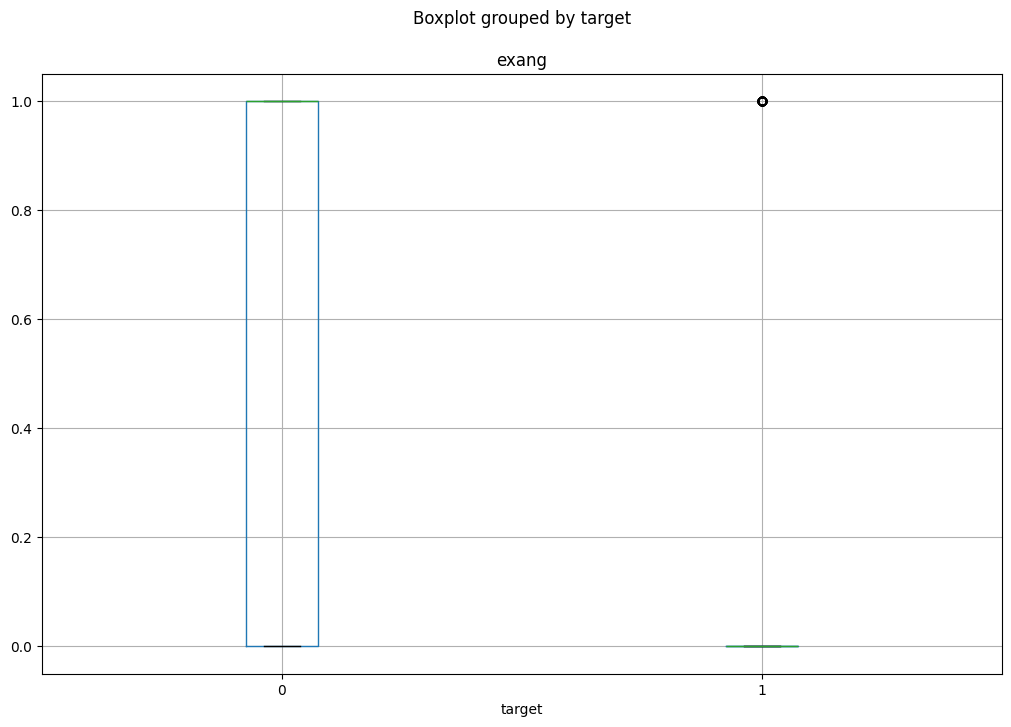

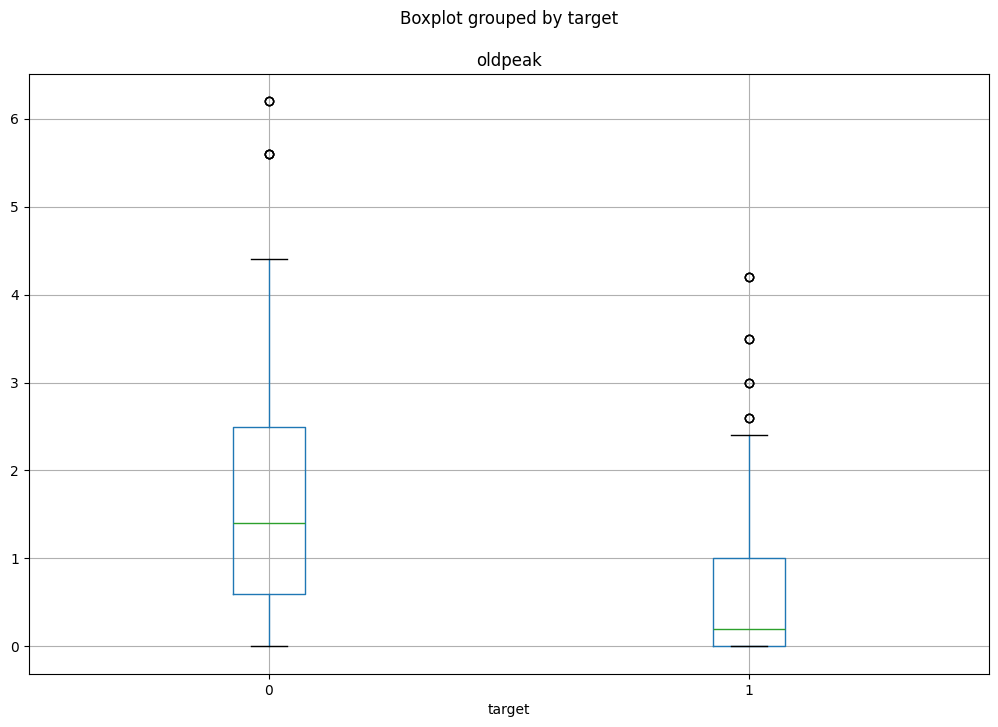

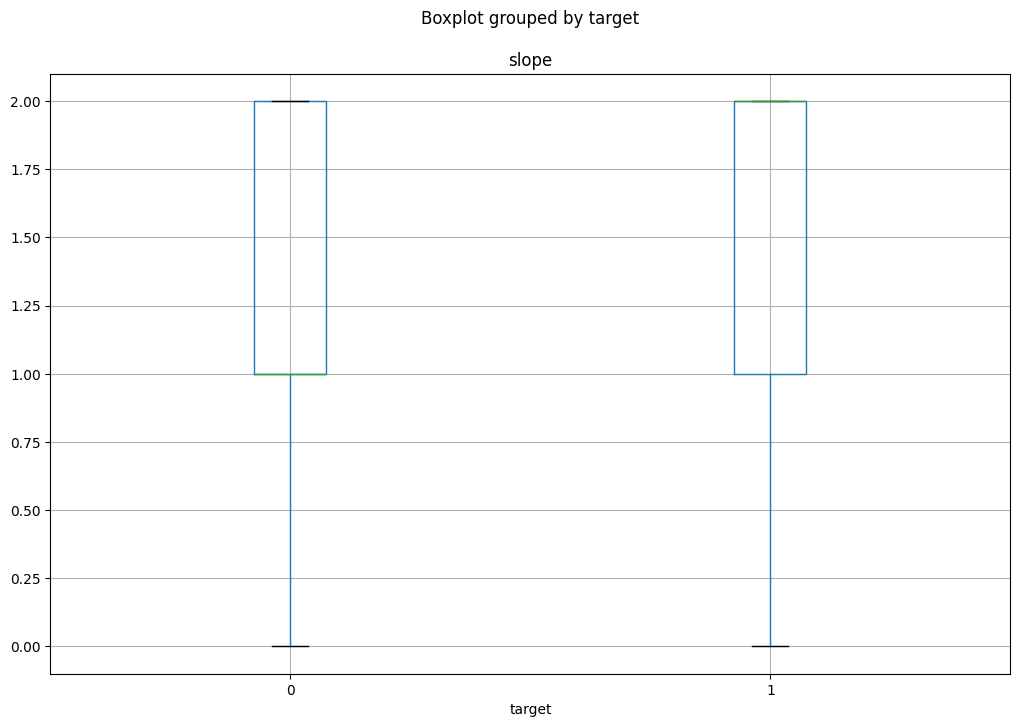

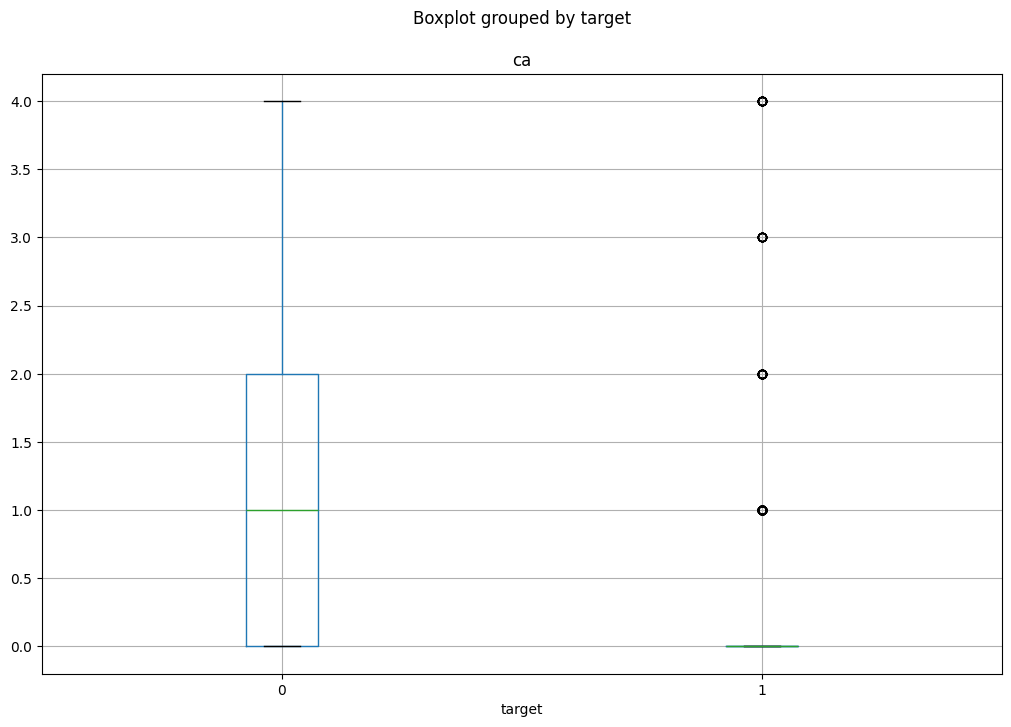

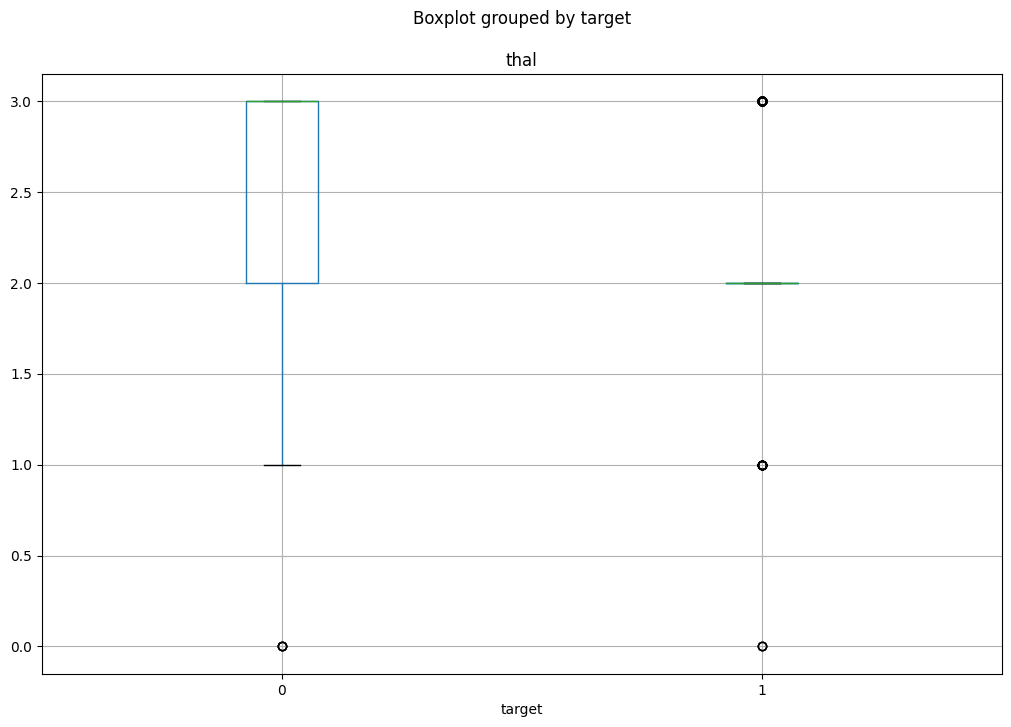

In [22]:
%matplotlib inline 

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for col in features:
    data.boxplot(column=col, by='target', figsize=(12,8))
    plt.title(col)

## Data Preprocessing

In [26]:
# Define age bin and lable
bins = [0,18,35,50,65,80,np.inf]
label = ['0-18','19-35','36-50','51-65', '66-80', '80+']

# Create an age range
data['age_range'] = pd.cut(data['age'], bins=bins, labels=label, right=True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,51-65
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,51-65
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,66-80
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,51-65
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,51-65


In [27]:
# Drop unneccessary columns
X = data.drop(['age', 'target'], axis=1)
y = data['target']

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variable
label_encoder = {}
for column in ['age_range']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoder[column] = le


In [52]:
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_range
0,1,0,125,212,0,1,168,0,1.0,2,2,3,2
1,1,0,140,203,1,0,155,1,3.1,0,0,3,2
2,1,0,145,174,0,1,125,1,2.6,0,0,3,3
3,1,0,148,203,0,1,161,0,0.0,2,1,3,2
4,0,0,138,294,1,1,106,0,1.9,1,3,2,2


In [53]:
# Scale the data
scaler = StandardScaler()

In [54]:
columns_to_scale = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_range']

In [55]:
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_range
0,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0.337245
1,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0.337245
2,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,1.846747
3,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0.337245
4,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0.337245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,0.337245
1021,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,0.337245
1022,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-1.172258
1023,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,-1.172258


In [56]:
X

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_range
0,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0.337245
1,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0.337245
2,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,1.846747
3,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0.337245
4,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0.337245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,0.337245
1021,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,0.337245
1022,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-1.172258
1023,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,-1.172258


In [57]:
# Check for the target distribution to see if there is data imbalance
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

## TRAIN | TEST SPLIT

In [58]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)

In [64]:
print('Training Cases: %d\nTest Cases: %d' %(X_train.shape[0], X_test.shape[0]))

Training Cases: 820
Test Cases: 205


## Building the Model

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [66]:
# Initialize and train the model
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [67]:
# Make a prediction
rfc_pred = rfc.predict(X_test)

In [75]:
# Predict probabilities
y_probs = rfc.predict_proba(X_test)[:, 1]

## Evaluate the model

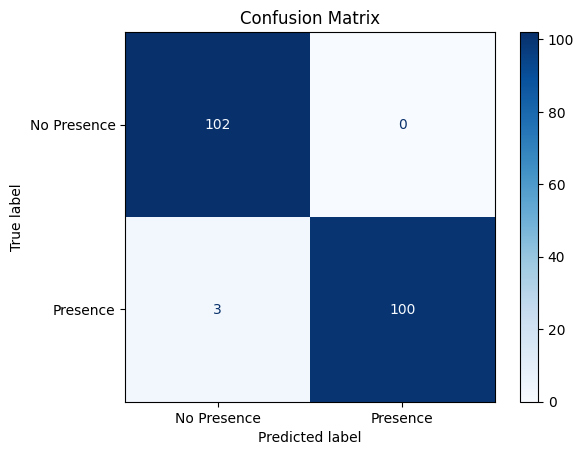

ROC AUC Score: 1.0


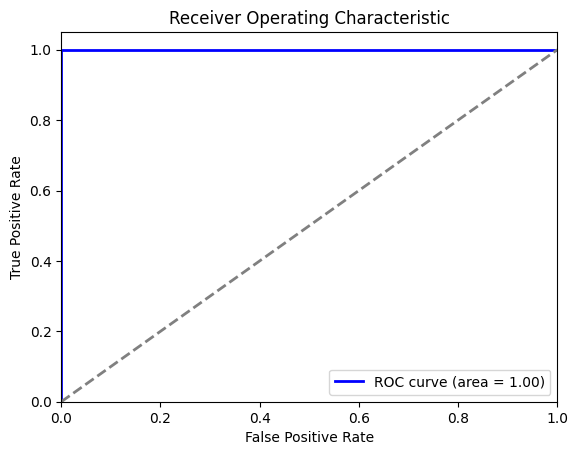

In [81]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)

# Display confusion matrix with meaningful labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Presence', 'Presence'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class
y_probs = rfc.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

A Receiver Operating Characteristic (ROC) Area Under the Curve (AUC) Score of 1.0 signifies that the model achieves optimal performance on the test data. This indicates that the model can accurately differentiate between the positive and negative classes without making any mistakes. The True Positive Rate (also known as sensitivity) is consistently 1, while the False Positive Rate (specifically, 1 minus specificity) remains consistently 0 across all threshold levels. 

## Verify the Model's Performance

In [82]:
from sklearn.model_selection import cross_val_score

auc_scores = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')
print(f'Cross-Validated AUC Scores: {auc_scores}')
print(f'Mean AUC Score: {auc_scores.mean()}')


Cross-Validated AUC Scores: [1.         1.         1.         1.         0.99599771]
Mean AUC Score: 0.9991995425957689


## Features Importance

     Features  Importance
1          cp    0.136942
11       thal    0.135188
6     thalach    0.131281
10         ca    0.124746
8     oldpeak    0.118291
3        chol    0.095263
2    trestbps    0.074888
7       exang    0.056579
9       slope    0.044783
0         sex    0.028511
12  age_range    0.023871
5     restecg    0.018315
4         fbs    0.011343


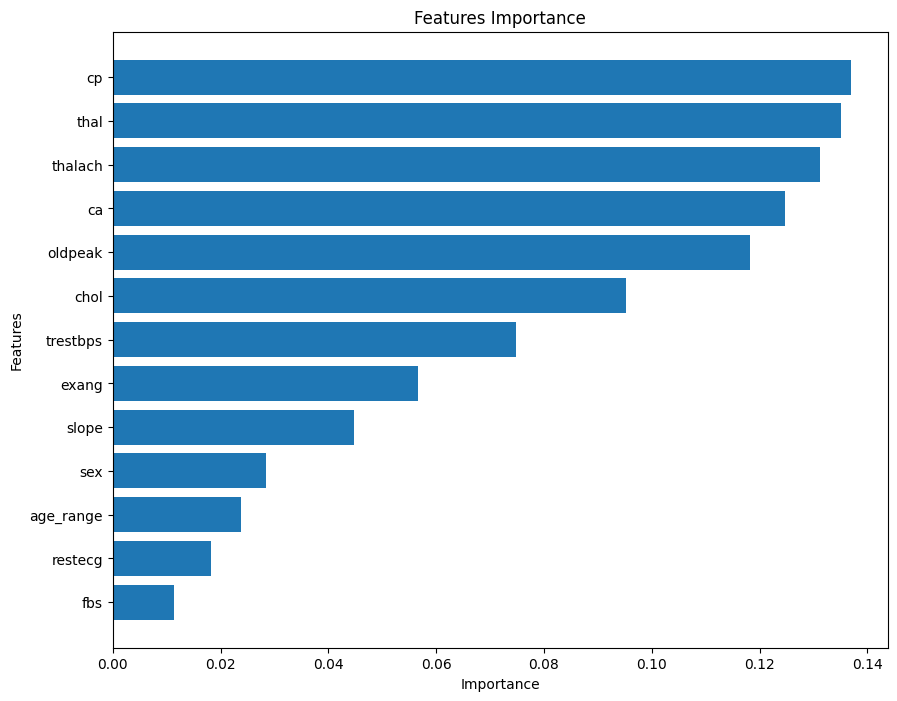

In [72]:
# Get the feature importance
importance = rfc.feature_importances_
feature_names = X.columns

# Create a Dataframe for clear visualiztion
feature_importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance': importance    
})

# Ensure data is sorted
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display features
print(feature_importance_df.head(15))

# Plot the feature importance
plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'])
plt.title('Features Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

## THE END